# Assignment III

You can work on this assignment on your own or in pairs. 

I would like you to be a bit creative with this last one, I will give you a suggested list, but feel free to add some extra analysis! Data science is never a rutine or a standard procedure ;)

- Pick a meaningful dataset for you
- **Briefly** summarize what it contains
- Test at least 3 hypothesis. Define them previously, writing down H0 and H1, your significance level and confidence. Would be nice if you use different tests. Extra points if the tests are interesting ;)
- Pick two numerical variables and adjust a linear model between them. Show the plot and describe what can be said about the model ($R^2$, coefficients, significance...). I don't want the variables to be perfectly correlated, I want the explanation to be right and clear. It is fine if the model is a disaster.
- Adjust a new model with at least 2 independent variables. One of them should be categorical and the other one numerical. Give a meaningful interpretation of the model. Does it increase its performance against the simple regression one? How?

Be visual please! Think about this assignment more like a business report rather than a university activity.

Some suggested sources for datasets:

- https://www.kaggle.com/datasets?fileType=csv&sizeEnd=50%2CMB
- https://piktochart.com/blog/100-data-sets/
- https://towardsdatascience.com/all-the-datasets-you-need-to-practice-data-science-skills-and-make-a-great-portfolio-857a348883b5
- https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/P4-Demographic-Data.csv

or...

In [1]:
%config IPCompleter.greedy=True
%load_ext memory_profiler
%matplotlib inline
%run Assignment_III_Helper.ipynb
%run Assignment_III_Plot.ipynb

## First dataset

In [2]:
kaggle_path = "letmewin97/coronavirus-tweets"
kaggle_path_Name = "Corona.csv"
kaggle_zip_file = True
kaggle_dataset_download(kaggle_path, kaggle_path_Name, kaggle_zip_file)

In [3]:
dfCoronaTweets = pd.read_csv(r'Corona.csv/Corona.csv')

In [4]:
dfCoronaTweets.head(3)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive


In [5]:
dfCoronaTweets.shape

(41157, 6)

In [6]:
#Checking out nulls: Location is not clean at all!
get_nulls_data(dfCoronaTweets)

,Total,PercNotNull
Location,8590,79.13
Sentiment,0,100.00
OriginalTweet,0,100.00
TweetAt,0,100.00
ScreenName,0,100.00
UserName,0,100.00


In [7]:
dfCoronaTweets['TweetAt']= dfCoronaTweets['TweetAt'].astype('datetime64[ns]')

In [8]:
dfCoronaTweets.dtypes

UserName                  int64
ScreenName                int64
Location                 object
TweetAt          datetime64[ns]
OriginalTweet            object
Sentiment                object
dtype: object

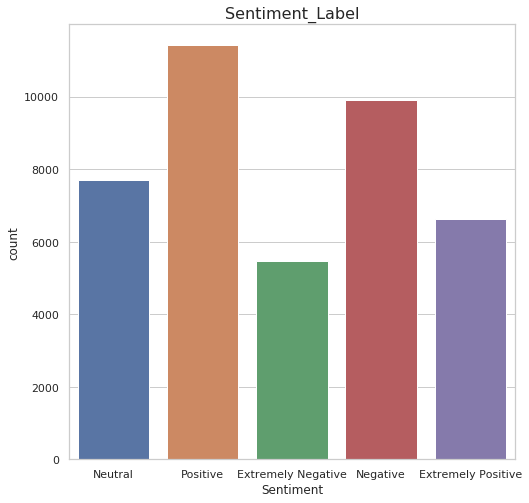

In [9]:
count_categorical(dfCoronaTweets, 'Sentiment', 'Sentiment_Label')

In [10]:
dfCoronaTweets_dummy = pd.get_dummies(dfCoronaTweets['Sentiment'])
dfCoronaTweets_dummy.shape

(41157, 5)

In [11]:
dfCoronaTweets_dummy.head(3)

,Extremely Negative,Extremely Positive,Negative,Neutral,Positive
0,0,0,0,1,0
1,0,0,0,0,1
2,0,0,0,0,1


In [12]:
dfCoronaTweets_concat = pd.concat([dfCoronaTweets, dfCoronaTweets_dummy], axis=1)
dfCoronaTweets_concat.shape

(41157, 11)

In [13]:
#dfCoronaTweets_concat['TweetAt']= dfCoronaTweets_concat['TweetAt'].astype('datetime64[ns]')

In [14]:
#dfCoronaTweets_concat.dtypes

In [15]:
dfCoronaTweets_concat.head(3)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Extremely Negative,Extremely Positive,Negative,Neutral,Positive
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,0,0,0,1,0
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,0,0,0,0,1
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,0,0,0,0,1


In [16]:
dfCoronaTweets_gr =  dfCoronaTweets_concat.groupby("TweetAt")['Extremely Negative', 'Extremely Positive', 'Negative', 'Neutral', 'Positive'].sum()
dfCoronaTweets_gr.reset_index(inplace=True)
dfCoronaTweets_gr.shape

(30, 6)

In [17]:
dfCoronaTweets_gr.head(3)

,TweetAt,Extremely Negative,Extremely Positive,Negative,Neutral,Positive
0,2020-01-04,90.0,89.0,156.0,125.0,170.0
1,2020-02-04,119.0,141.0,242.0,201.0,251.0
2,2020-03-04,103.0,117.0,208.0,154.0,228.0


In [18]:
dfCoronaTweets_gr_melt = pd.melt(dfCoronaTweets_gr,id_vars=['TweetAt'], value_vars=['Extremely Negative', 'Extremely Positive', 'Negative', 'Neutral', 'Positive'],
                           var_name = "evaluation", value_name = "count")
dfCoronaTweets_gr_melt.shape

(150, 3)

In [19]:
dfCoronaTweets_gr_melt.head(3)

,TweetAt,evaluation,count
0,2020-01-04,Extremely Negative,90.0
1,2020-02-04,Extremely Negative,119.0
2,2020-03-04,Extremely Negative,103.0


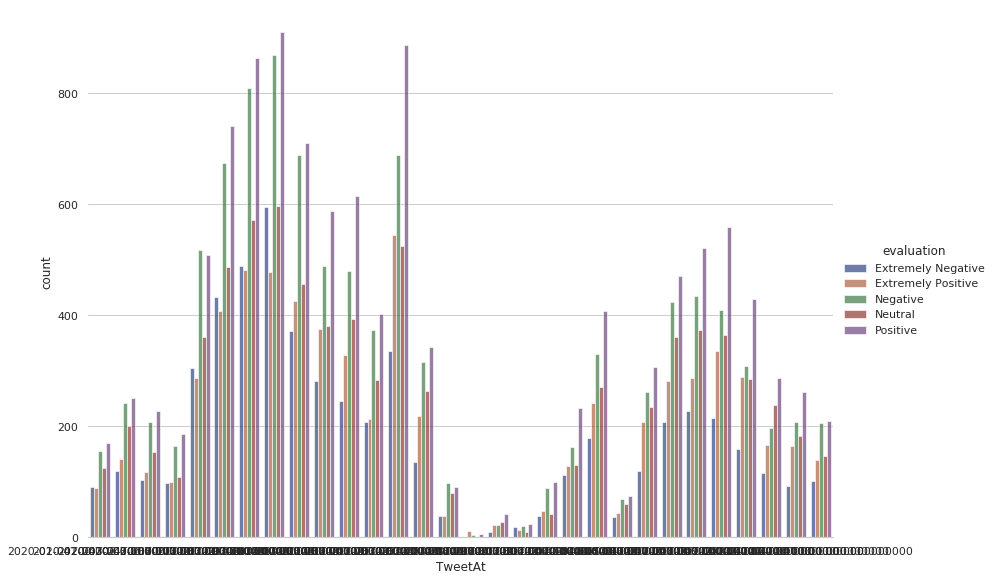

In [20]:
categorical_plot(df=dfCoronaTweets_gr_melt, p_kind="bar", p_x="TweetAt", p_y="count", 
                 p_hue ="evaluation", p_ci="sd", p_palette="dark", p_alpha=.6, p_height=8)

In [21]:
#pd.isnull(dfCoronaTweets_gr_melt)
dfCoronaTweets_gr_melt.isnull().values.any()

False

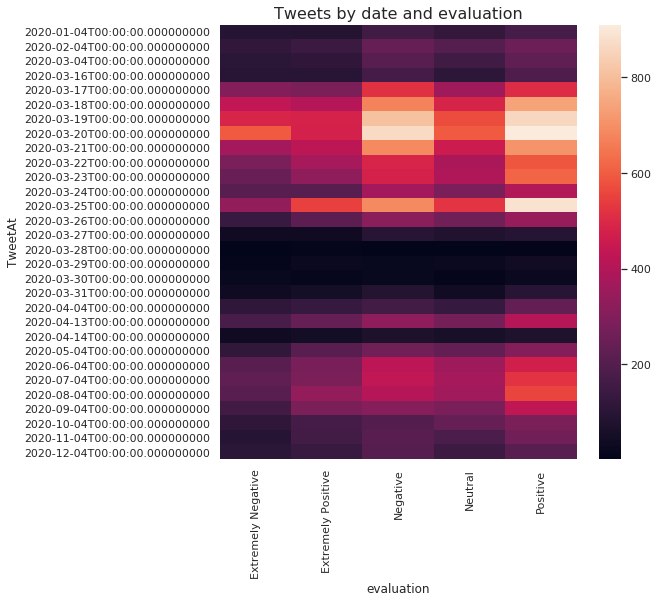

In [22]:
dfCoronaTweets_gr_melt_pivot = dfCoronaTweets_gr_melt.pivot('TweetAt','evaluation','count')
pivot_heatmap(dfCoronaTweets_gr_melt_pivot, "Tweets by date and evaluation")

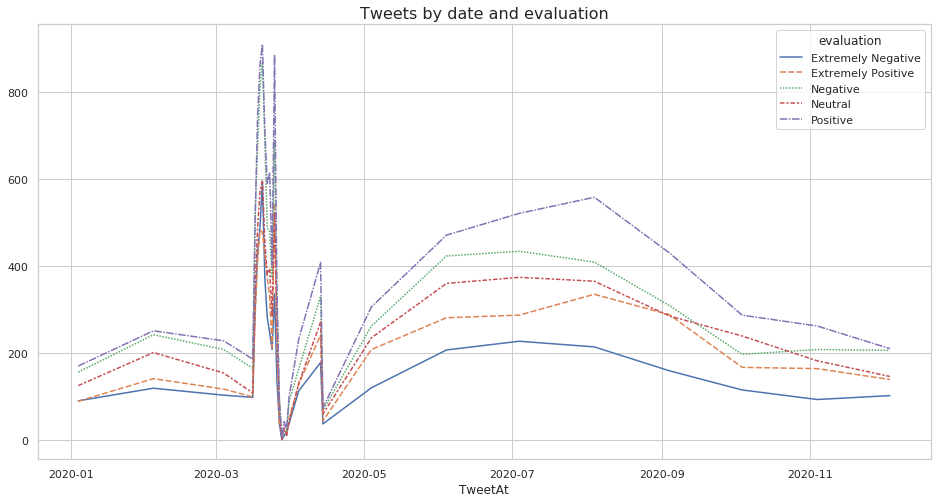

In [23]:
pivot_lineplot(dfCoronaTweets_gr_melt_pivot, "Tweets by date and evaluation")

In [24]:
#dfCoronaTweets_gr_loc =  dfCoronaTweets_concat.groupby("Location").sum()
#dfCoronaTweets_gr_loc

### Hypothesis 1: Average perception difference in first semester versus second semester of the year

#### Population we have

In [25]:
dfCoronaTweets.shape

(41157, 6)

In [26]:
#I decided to create my own compound index, based on a simple scale [-1, 1]
dfCoronaTweets['compound_index'] = dfCoronaTweets.apply (lambda row: get_compound_acceptance_index(row), axis=1)
dfCoronaTweets.head(3)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,compound_index
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,0.0
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,0.5
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,0.5


In [27]:
dfCoronaTweets_first_sem = dfCoronaTweets[dfCoronaTweets['TweetAt'] < '2020-07-01']
dfCoronaTweets_first_sem.shape

(33245, 7)

In [28]:
dfCoronaTweets_second_sem = dfCoronaTweets[dfCoronaTweets['TweetAt'] > '2020-06-30']
dfCoronaTweets_second_sem.shape

(7912, 7)

In [29]:
dfCoronaTweets_first_sem.head(3)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,compound_index
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,0.0
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,0.5
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,0.5


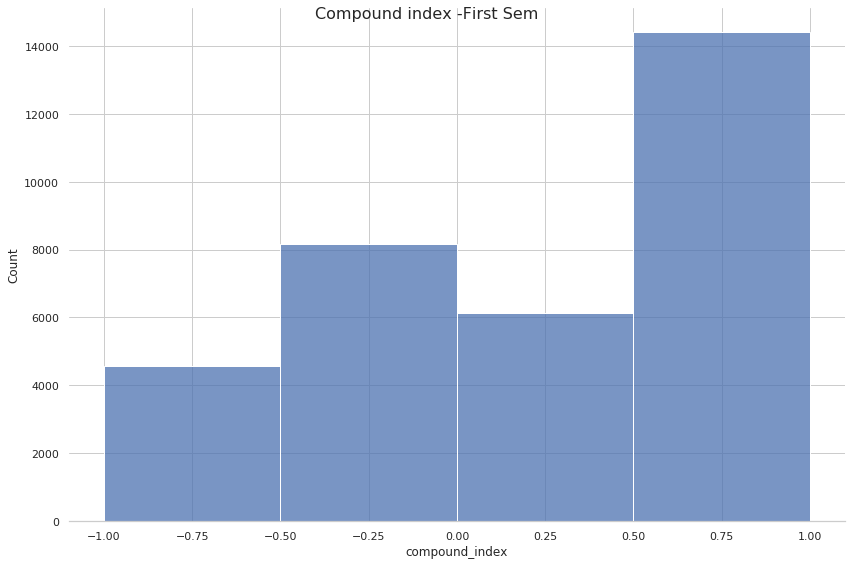

In [30]:
custom_displot(dfCoronaTweets_first_sem, p_x="compound_index", p_bins=[-1, -0.5, 0, 0.5, 1], p_discrete = True, p_height=8, p_ax_title = "Compound index -First Sem")

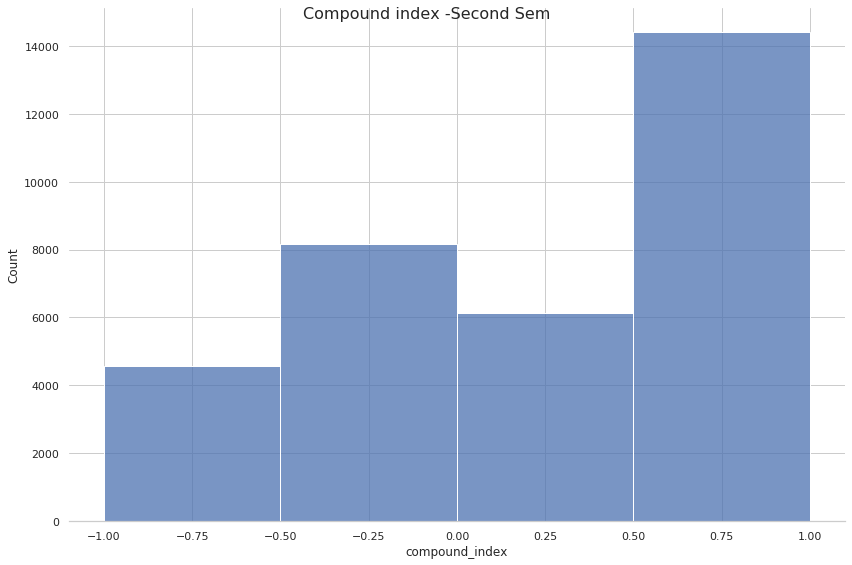

In [31]:
custom_displot(dfCoronaTweets_first_sem, p_x="compound_index", p_bins=[-1, -0.5, 0, 0.5, 1], p_discrete = True, p_height=8, p_ax_title = "Compound index -Second Sem")

In [32]:
#sns.set(style="whitegrid")

# Initialize the matplotlib figure
#f, ax = plt.subplots(figsize=(8, 8))
#sns.boxplot(x="Sentiment", y="compound_index", data=dfCoronaTweets_second_sem)
#sns.stripplot(x="Sentiment", y="compound_index", data=dfCoronaTweets_second_sem, color=".25")
#plt.title('Class - fare price distribution')
#plt.show()

In [33]:
first_sem_mean = dfCoronaTweets_first_sem["compound_index"].mean()
second_sem_mean = dfCoronaTweets_second_sem["compound_index"].mean()

print('First semester mean: {}'.format(first_sem_mean))
print('Second semester mean: {}'.format(second_sem_mean))

First semester mean: 0.035283501278387724
Second semester mean: 0.09131698685540951


In [34]:
first_sem_std = dfCoronaTweets_first_sem.loc[:,"compound_index"].std()
second_sem_std = dfCoronaTweets_second_sem.loc[:,"compound_index"].std()

print('First semester std: {}'.format(first_sem_std))
print('Second semester std: {}'.format(second_sem_std))

First semester std: 0.6512719165471448
Second semester std: 0.6391529002573112


#### getting sample from both DFs

In [35]:
dfCoronaTweets_first_sem = dfCoronaTweets_first_sem.sample(frac=0.5, replace=False, random_state=1)
dfCoronaTweets_first_sem.shape

(16622, 7)

In [36]:
dfCoronaTweets_second_sem = dfCoronaTweets_second_sem.sample(frac=0.5, replace=False, random_state=1)
dfCoronaTweets_second_sem.shape

(3956, 7)

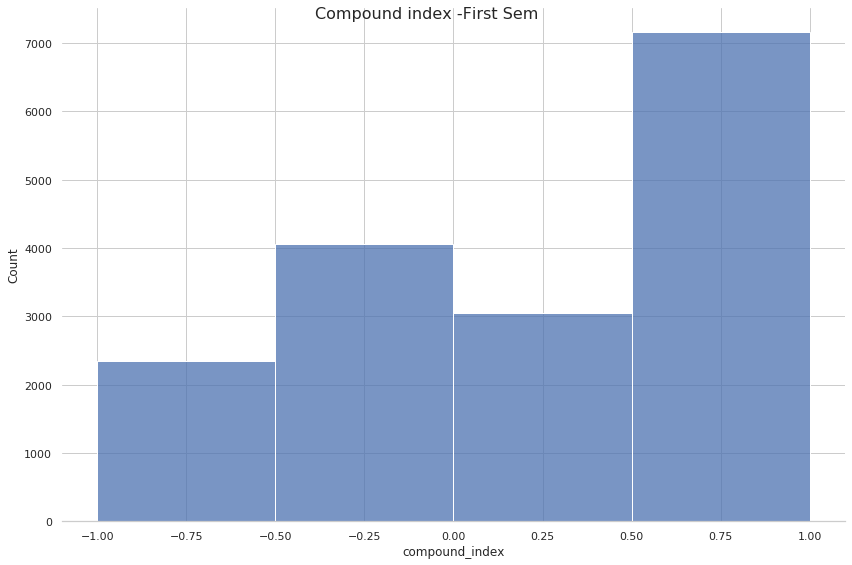

In [37]:
custom_displot(dfCoronaTweets_first_sem, p_x="compound_index", p_bins=[-1, -0.5, 0, 0.5, 1], p_discrete = True, p_height=8, p_ax_title = "Compound index -First Sem")

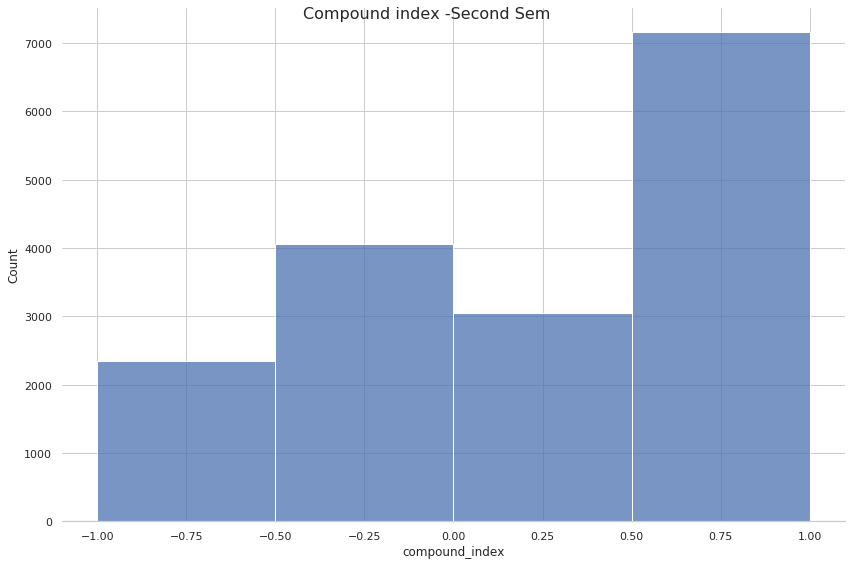

In [38]:
custom_displot(dfCoronaTweets_first_sem, p_x="compound_index", p_bins=[-1, -0.5, 0, 0.5, 1], p_discrete = True, p_height=8, p_ax_title = "Compound index -Second Sem")

In [39]:
first_sem_mean = dfCoronaTweets_first_sem["compound_index"].mean()
second_sem_mean = dfCoronaTweets_second_sem["compound_index"].mean()

print('First semester mean: {}'.format(first_sem_mean))
print('Second semester mean: {}'.format(second_sem_mean))

First semester mean: 0.03164480808566959
Second semester mean: 0.09567745197168857


In [40]:
first_sem_std = dfCoronaTweets_first_sem.loc[:,"compound_index"].std()
second_sem_std = dfCoronaTweets_second_sem.loc[:,"compound_index"].std()

print('First semester std: {}'.format(first_sem_std))
print('Second semester std: {}'.format(second_sem_std))

First semester std: 0.6542201623873477
Second semester std: 0.6389261068542247


In [41]:
#The recall:
# I know the equal_var = True will perform Welch’s t-test, which does not assume equal population variance.
Ttest_indResult_tuple = sts.ttest_ind(dfCoronaTweets_first_sem.compound_index,
                dfCoronaTweets_second_sem.compound_index,
                equal_var= True)

In [42]:
#statistic
Ttest_indResult_tuple[0]

-5.557545338825863

In [43]:
#pvalue
Ttest_indResult_tuple[1]

2.7698633168195436e-08

In [44]:
ttest_hypothesis_determination(pval = Ttest_indResult_tuple[1], p_alpha = 0.05)

I have enough evidence to reject H0. Therefore, I assume H1 with a confidence of 95.0% and significance of 5.0%


In [45]:
extra_explanation = ("A pvalue close to 0 expresses us that it's highly improbable a Students's t-distribution centred"
                     "on a mean of {} (first semester),"
                     "also contains an observation of {} (second semester)."
                     "Also, "
                     "second semester mean it's {} standard erros away from the first semester mean"
                    )
print(extra_explanation.format(first_sem_mean,second_sem_mean, Ttest_indResult_tuple[0]))

A pvalue close to 0 expresses us that it's highly improbable a Students's t-distribution centredon a mean of 0.03164480808566959 (first semester),also contains an observation of 0.09567745197168857 (second semester).Also, second semester mean it's -5.557545338825863 standard erros away from the first semester mean
